# Preprocessing of smoking.csv dataset

In [65]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
smoking_data = pd.read_csv("data/smoking.csv")
smoking_data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


### Splitting of data into train and test datasets

In [55]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(smoking_data, test_size=0.2, train_size=0.8, random_state=1337)


### We check if we have any missing values for possible imputation
**As shown in the cell below, there are no missing values**


In [56]:
display(train.isnull().sum())
display(test.isnull().sum())

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

### Check for non-numerical variables
**We can see that columns gender, oral and tartar are not represented by a number, but rather by characters**

In [57]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44553 entries, 10505 to 3223
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44553 non-null  int64  
 1   gender               44553 non-null  object 
 2   age                  44553 non-null  int64  
 3   height(cm)           44553 non-null  int64  
 4   weight(kg)           44553 non-null  int64  
 5   waist(cm)            44553 non-null  float64
 6   eyesight(left)       44553 non-null  float64
 7   eyesight(right)      44553 non-null  float64
 8   hearing(left)        44553 non-null  float64
 9   hearing(right)       44553 non-null  float64
 10  systolic             44553 non-null  float64
 11  relaxation           44553 non-null  float64
 12  fasting blood sugar  44553 non-null  float64
 13  Cholesterol          44553 non-null  float64
 14  triglyceride         44553 non-null  float64
 15  HDL                  44553 non-null  f

None

<class 'pandas.core.frame.DataFrame'>
Index: 11139 entries, 39307 to 27055
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   11139 non-null  int64  
 1   gender               11139 non-null  object 
 2   age                  11139 non-null  int64  
 3   height(cm)           11139 non-null  int64  
 4   weight(kg)           11139 non-null  int64  
 5   waist(cm)            11139 non-null  float64
 6   eyesight(left)       11139 non-null  float64
 7   eyesight(right)      11139 non-null  float64
 8   hearing(left)        11139 non-null  float64
 9   hearing(right)       11139 non-null  float64
 10  systolic             11139 non-null  float64
 11  relaxation           11139 non-null  float64
 12  fasting blood sugar  11139 non-null  float64
 13  Cholesterol          11139 non-null  float64
 14  triglyceride         11139 non-null  float64
 15  HDL                  11139 non-null  

None

**Here we change character values to corresponding numerical**
**Y is exchanged to 1, N to 0 and correspondingly, M to 1, F to 0**

In [58]:
train["tartar"] = train["tartar"].replace(["Y","N"],[1,0])
train["gender"] = train["gender"].replace(["M","F"],[1,0])
train["oral"] = train["oral"].replace(["Y","N"], [1,0])
display(train.head(5))

test["tartar"] = test["tartar"].replace(["Y","N"],[1,0])
test["gender"] = test["gender"].replace(["M","F"],[1,0])
test["oral"] = test["oral"].replace(["Y","N"], [1,0])
display(test.head(5))

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
10505,13147,1,25,170,75,89.0,1.0,1.0,1.0,1.0,...,18.5,1.0,0.9,35.0,53.0,61.0,1,1,1,1
10222,12793,1,50,170,85,90.0,1.2,1.2,1.0,1.0,...,15.5,1.0,0.9,40.0,47.0,44.0,1,0,1,1
5115,6453,0,45,150,60,81.2,0.6,0.5,1.0,1.0,...,13.6,1.0,0.9,33.0,57.0,36.0,1,0,1,0
38468,48071,1,45,160,65,87.0,1.0,1.2,1.0,1.0,...,16.4,1.0,1.2,43.0,52.0,61.0,1,0,1,1
35446,44299,1,40,180,80,86.0,1.2,0.9,1.0,1.0,...,14.5,1.0,0.8,15.0,16.0,31.0,1,0,1,1


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
39307,49114,1,35,175,65,73.7,0.7,1.0,1.0,1.0,...,15.3,1.0,0.9,17.0,3.0,15.0,1,0,1,0
36845,46050,0,40,155,40,59.0,1.0,1.0,1.0,1.0,...,11.5,1.0,0.8,24.0,15.0,12.0,1,0,0,0
13773,17169,0,75,145,40,68.5,0.7,0.7,1.0,1.0,...,11.1,1.0,1.1,21.0,10.0,13.0,1,0,0,0
45046,2398,1,40,175,80,91.0,1.2,1.2,1.0,1.0,...,16.7,1.0,0.9,28.0,43.0,51.0,1,0,1,0
54165,48106,0,40,160,65,82.0,1.5,1.5,1.0,1.0,...,14.8,1.0,0.9,28.0,18.0,24.0,1,0,0,0


**Check whether each column has multiple values and that we don't have any redundant columns in our data**

In [59]:
display(train.columns[list(train.nunique() == 1)])
display(test.columns[list(train.nunique() == 1)])

Index(['oral'], dtype='object')

Index(['oral'], dtype='object')

**Column "oral" is containing only 1 unique value, therefore it is redundant, and we can drop it**
**We can also drop the column "ID", as it does not carry any relevant information**

In [60]:
train.drop(["ID","oral"], axis = 1, inplace=True)
test.drop(["ID", "oral"], axis = 1, inplace= True)

### Add "bmi" column based on weight and height
**Based on bmi, we can calculate whether the patient is in healthy weight = 0, obese = 1 or malnourished = -1 and add these values to the column "healthy weight"**

In [61]:
train["bmi"] = round(train["weight(kg)"]/(train["height(cm)"]/100)**2, 2)
train.loc[train["bmi"] > 24.9, "healthy weight"] = 1
train.loc[train["bmi"] < 18.5, "healthy weight"] = -1
train.loc[(train["bmi"] <= 24.9) & (train["bmi"]>= 18.5), "healthy weight"] = 0

test["bmi"] = round(test["weight(kg)"]/(test["height(cm)"]/100)**2, 2)
test.loc[test["bmi"] > 24.9, "healthy weight"] = 1
test.loc[test["bmi"] < 18.5, "healthy weight"] = -1
test.loc[(test["bmi"] <= 24.9) & (test["bmi"]>= 18.5), "healthy weight"] = 0


### Preprocessing of eyesight columns
**As we have two eyesight columns (one for each eye), it would be beneficial for us to treat vision as a single column**
**Current scale ranges from 0.1-2.0, with 0.1 being the worst, 2.0 meaning best vision. Values of 9.9 signal total blindness in given eye. We changed all 9.9 values to 0.0 for better usage in categorizing our data.**
***We intend to divide respondents into 5 different groups:
0 - abnormally good vision - total visual acuity ( > 2.5)
1 - normal vision - total VA between (1.1;2.5)
2 - mildly impaired vision - total VA between (0.66;1.0)
3 - severely impaired vision - total VA between (0.2;0.66)
4 - blindness - total VA <0.2***

[Text(0, 0, '33148'),
 Text(0, 0, '8390'),
 Text(0, 0, '2253'),
 Text(0, 0, '747'),
 Text(0, 0, '15')]

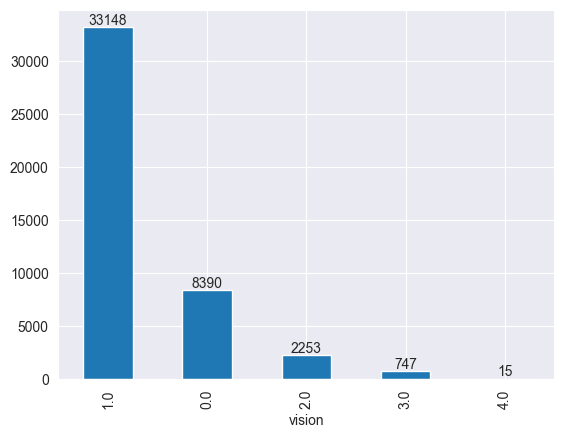

In [79]:
train.loc[train["eyesight(right)"] == 9.9, "eyesight(right)"] = 0
train.loc[train["eyesight(left)"] == 9.9, "eyesight(left)"] = 0
train["eyesight_total"] = train["eyesight(right)"] + train["eyesight(left)"]
train.loc[train["eyesight_total"] < 0.2, "vision"] = 4
train.loc[(train["eyesight_total"] >= 0.2)  & (train["eyesight_total"] < 0.66), "vision"] = 3
train.loc[(train["eyesight_total"] >= 0.66)  & (train["eyesight_total"] < 1.0), "vision"] = 2
train.loc[(train["eyesight_total"] >= 1.1)  & (train["eyesight_total"] < 2.5), "vision"] = 1
train.loc[(train["eyesight_total"] >= 2.5), "vision"] = 0

vision_plot = train["vision"].value_counts().plot(kind="bar")
vision_plot.bar_label(vision_plot.containers[0])

### Dumping of split data into separate csv files

In [62]:
train.to_csv("data/train_data.csv", index_label=False, index=False)
test.to_csv("data/test_data.csv", index_label=False, index=False)